In [20]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#Importing data
df = pd.read_csv('./train.csv')
# shape of the dataset
df.shape

(891, 12)

In [3]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# head of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# tail of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Finding rows with more than 35% of missing values
x = df.isnull().sum()
drop_col = x[x>(0.35*df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [8]:
# Column index of cabin
drop_col.index

Index(['Cabin'], dtype='object')

In [9]:
# Dropping columns with more than 35% of missing values
df.drop(drop_col.index,axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# Checking missing values after dropping variables
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

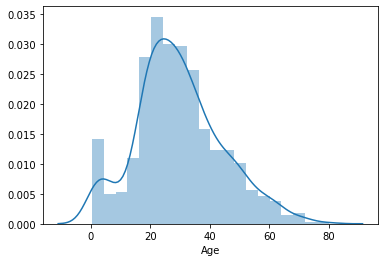

In [11]:
# Checking distribution of Age
sn.distplot(df['Age'])

In [12]:
# Since Age distribution is roughly normal mean will be used to impute missing values in Age
meanAge=np.mean(df['Age'])
df['Age'].fillna(meanAge,inplace=True)

In [13]:
#Checking Age imputation
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

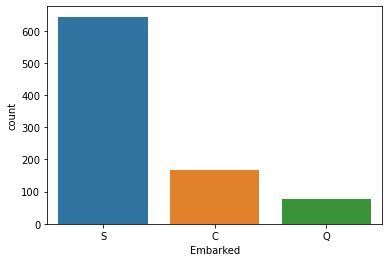

In [14]:
# Checking Embarked  distribution
sn.countplot(data=df,x='Embarked')

In [15]:
# Since majority of Embarked are from class 'S' missing values are imputed by 'S'
df['Embarked'].fillna('S',inplace=True)

In [16]:
#Checking Embarked imputation
df.isnull().sum()  # No missing values are detected

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
# Removing unnecessary variables
train_df = df.copy() # making a copy of the dataset
col_to_drop = ["PassengerId", "Ticket", "Name"]
train_df.drop(col_to_drop, axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


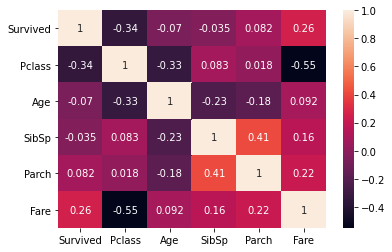

In [18]:
# Correlations
sn.heatmap(train_df.corr(),annot=True)

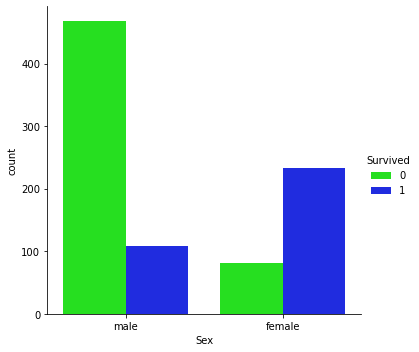

In [22]:
# Sex vs Survived
sn.catplot(data=train_df,x='Sex',hue='Survived',kind='count',palette='hsv',height=5)
plt.show();  # Females have more chance of surviving compared to males

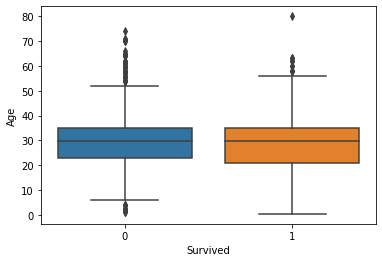

In [23]:
# Age vs Survived
sn.boxplot(data=train_df,y='Age',x='Survived')  # The chance of survival is somewhat lower for the passengers with more age

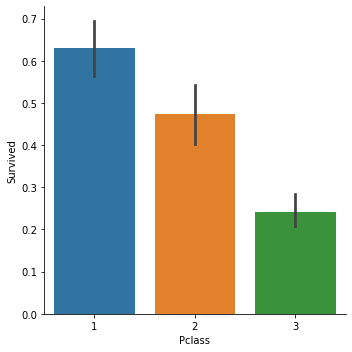

In [24]:
# Pclass vs Survived
sn.catplot(x = "Pclass", y="Survived", data = train_df, kind="bar", height = 5) # More chance of survival for higher class

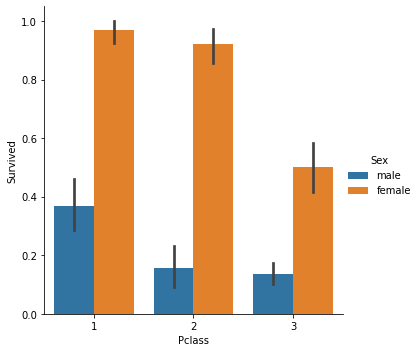

In [25]:
# Survived vs Pclass and Sex
sn.catplot(x = "Pclass", y="Survived", hue="Sex", data=train_df, height = 5, kind="bar") 
# In each class females have higher chances of survival in comparison to male passengers.

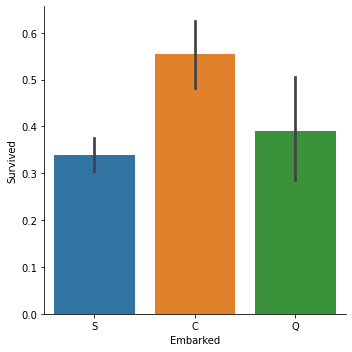

In [26]:
# Embarked vs Survived
sn.catplot(x = "Embarked", y="Survived", data = train_df, kind="bar", height = 5) # More survival chance for passengers embarked form C(Cherbourg) station

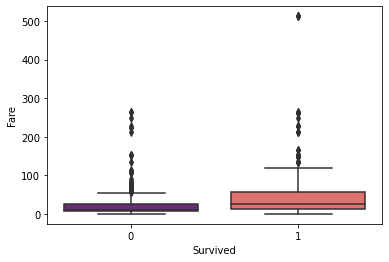

In [27]:
# Survived vs Fare
sn.boxplot(x='Survived',y='Fare',data=train_df,palette='magma') # More survival chance for passengers with high fare

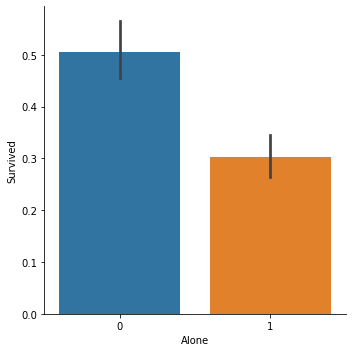

In [28]:
# Alone vs Survived
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df['Alone'] = [0 if train_df['FamilySize'][i]>0 else 1 for i in train_df.index]
sn.catplot(x = "Alone", y="Survived", data = train_df, kind="bar", height = 5) # Passengers with family have a higher chance of survival 

## Conclusions
1. Females have more chance of surviving compared to males.
2. The chance of survival is somewhat lower for the passengers with higher ages.
3. The chance of survival is higher for the passengers with higher classes.
4. In each passenger class females have much higher chances of survival in comparison to male passengers.
5. The chance of survival is higher for passengers embarked form C(Cherbourg) station.
6. The chance of survival is higher for passengers with higher fare values.
7. The passengers who are with their families have a higher chance of survival.